In [220]:
# Libraries 
import requests as r 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings('ignore')

sns.set()

In [58]:
# Links for MELI 

base_url_col = 'https://api.mercadolibre.com/sites/MCO/'

In [59]:
# Categories for Colombia
response = r.get(base_url_col + 'categories')
categories = response.json()

In [60]:
# Scan each category with 300 products each

offset_range = range(0, 500, 50)

meli_products = []
for i, item in enumerate(categories): 
    items_category = []
    for offset in offset_range: 
        category_id = item.get("id", None)
        response = r.get(base_url_col + 'search?category=%s&offset=%s' % (category_id, offset) )
        result = response.json()
        products_category = pd.DataFrame(result['results'])
        items_category.append(products_category)
    
    df_category = pd.concat(items_category)
    df_category['category_name'] = item['name']
    df_category['category_id'] = category_id
        
    meli_products.append(df_category)
    
    print("Scanning.... %.1f%%" % (i/len(categories)*100))
print("Done :)")


Scanning.... 0.0%
Scanning.... 3.2%
Scanning.... 6.5%
Scanning.... 9.7%
Scanning.... 12.9%
Scanning.... 16.1%
Scanning.... 19.4%
Scanning.... 22.6%
Scanning.... 25.8%
Scanning.... 29.0%
Scanning.... 32.3%
Scanning.... 35.5%
Scanning.... 38.7%
Scanning.... 41.9%
Scanning.... 45.2%
Scanning.... 48.4%
Scanning.... 51.6%
Scanning.... 54.8%
Scanning.... 58.1%
Scanning.... 61.3%
Scanning.... 64.5%
Scanning.... 67.7%
Scanning.... 71.0%
Scanning.... 74.2%
Scanning.... 77.4%
Scanning.... 80.6%
Scanning.... 83.9%
Scanning.... 87.1%
Scanning.... 90.3%
Scanning.... 93.5%
Scanning.... 96.8%
Done :)


In [293]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15496 entries, 0 to 49
Data columns (total 34 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    15496 non-null  object 
 1   site_id               15496 non-null  object 
 2   title                 15496 non-null  object 
 3   seller                15496 non-null  object 
 4   price                 15164 non-null  float64
 5   prices                12749 non-null  object 
 6   sale_price            0 non-null      object 
 7   currency_id           15164 non-null  object 
 8   available_quantity    15496 non-null  int64  
 9   sold_quantity         15496 non-null  int64  
 10  buying_mode           15496 non-null  object 
 11  listing_type_id       15496 non-null  object 
 12  stop_time             15496 non-null  object 
 13  condition             14996 non-null  object 
 14  permalink             15496 non-null  object 
 15  thumbnail             

In [294]:
df.describe()

,price,available_quantity,sold_quantity,discount,discount_percentage
count,1.516400e+04,15496.000000,15496.000000,9.430000e+02,943.000000
mean,1.813712e+07,250.985996,144.536461,1.547027e+05,0.269377
std,1.810188e+08,2594.106917,312.060916,2.465925e+05,0.144439
min,1.000000e+00,1.000000,0.000000,7.000000e+02,0.017221
25%,2.290000e+04,1.000000,5.000000,1.947000e+04,0.156576
50%,6.425000e+04,1.000000,50.000000,5.500000e+04,0.250031
75%,2.090000e+05,50.000000,250.000000,1.791990e+05,0.350584
max,8.500000e+09,50000.000000,5000.000000,2.400100e+06,0.810811


In [61]:
# Temporalidad 3 meses 
# Categorías y subcategorias
# Descuentos entre paises? 
# Cantidades vendidas 
# Descuentos 
# Price

# Get the discount and the % of change on it
df = pd.concat(meli_products)
df.head()
df['discount'] = df['original_price'] - df['price']
df['discount_percentage'] = (df['original_price'] - df['price']) / df['original_price']
df['discount'] = df['discount'].astype(float)
df['discount_percentage'] = df['discount_percentage'].astype(float)
discount_products = df[~df['original_price'].isnull()]

In [65]:
# Reference values for the next charts
discount_products.groupby("category_name").agg({"discount": ["mean", "count"], "discount_percentage": ["mean", "count"]}).reset_index()

category_name      discount       discount_percentage  \
                                            mean count                mean   
0        Accesorios para Vehículos  5.210105e+04    58            0.241423   
1                             Agro  2.699694e+05     8            0.233342   
2              Alimentos y Bebidas  1.022335e+04    37            0.211817   
3              Animales y Mascotas  2.013333e+04     3            0.480407   
4       Antigüedades y Colecciones  1.500000e+03     1            0.202703   
5       Arte, Papelería y Mercería  1.319219e+04    32            0.260008   
6                            Bebés  8.643035e+04    20            0.311496   
7       Belleza y Cuidado Personal  5.144000e+04    25            0.459209   
8            Carros, Motos y Otros  1.300000e+06     1            0.017221   
9            Celulares y Teléfonos  3.193857e+05   141            0.229391   
10                     Computación  2.987090e+05    78            0.196595   
11          Consolas y Videojuegos  1.683291e+05    90            0.270566   
12            Cámaras y Accesorios  2.191715e+05    29            0.337219   
13              Deportes y Fitness  1.739207e+05    56            0.344040   
14               Electrodomésticos  1.043148e+05    71            0.250922   
15      Electrónica, Audio y Video  1.872203e+05    37            0.291252   
16     Herramientas y Construcción  3.376575e+04    16            0.153798   
17                 Hogar y Muebles  1.703803e+05    42            0.354880   
18           Industrias y Oficinas  1.162762e+05    13            0.314146   
19          Instrumentos Musicales  1.574832e+05    19            0.264822   
20               Juegos y Juguetes  7.492653e+04    75            0.255354   
21      Música, Películas y Series  1.795227e+04    44            0.266331   
22  Recuerdos, Piñatería y Fiestas  7.800000e+03     1            0.376812   
23                 Relojes y Joyas  1.216538e+05    13            0.343565   
24               Ropa y Accesorios  3.417857e+04     7            0.322666   
25     Salud y Equipamiento Médico  4.526338e+04    26            0.327085   

          
   count  
0     58  
1      8  
2     37  
3      3  
4      1  
5     32  
6     20  
7     25  
8      1  
9    141  
10    78  
11    90  
12    29  
13    56  
14    71  
15    37  
16    16  
17    42  
18    13  
19    19  
20    75  
21    44  
22     1  
23    13  
24     7  
25    26

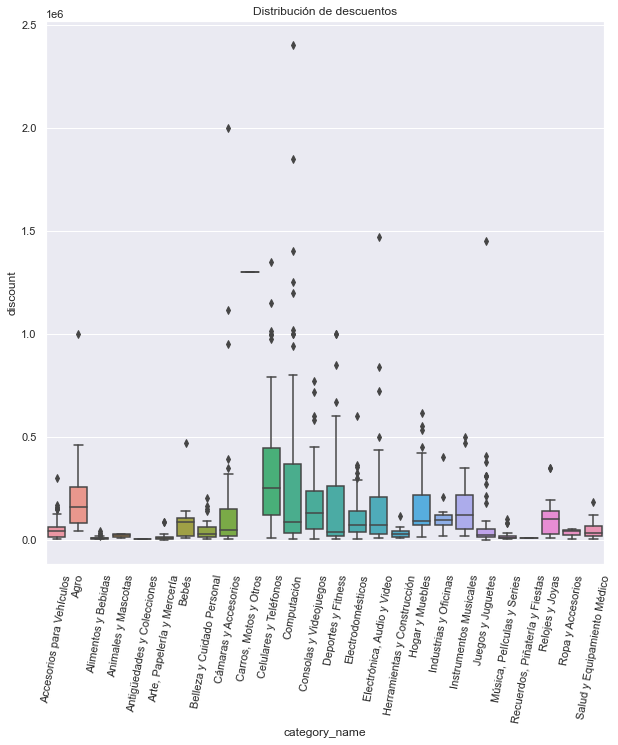

In [62]:
plt.rcParams['figure.figsize']=(10,10)
plt.xticks(rotation=80)
plt.title("Distribución de descuentos")
ax = sns.boxplot(data=discount_products, x='category_name', y='discount')

Es interesante ver cómo es la distribución de descuentos en las diferentes categorías y poder compararlas. De por sí solo se ven categorías que tienen **descuentos muy ajustados** u otras que tienen una **variedad de descuentos muy grandes**. Uno podría pensar que la categoría relacionadas a tecnología tienen una alta competencia y tienen que destacar de alguna forma, la cual puede materializarse en mayor guerra de precios. 

Igualmente, a partir de aquí se puede investigar un poco más de las categorías que más variedad tienen y sería interesante ver los % relativos de esos descuentos entre categorías más que la comparación de descuentos entre sí. 

Finalmente, observamos que celulares es en promedio el que tiene más descuentos, claramente hay unos outliers de descuentos que pueden darse por diferentes razones.


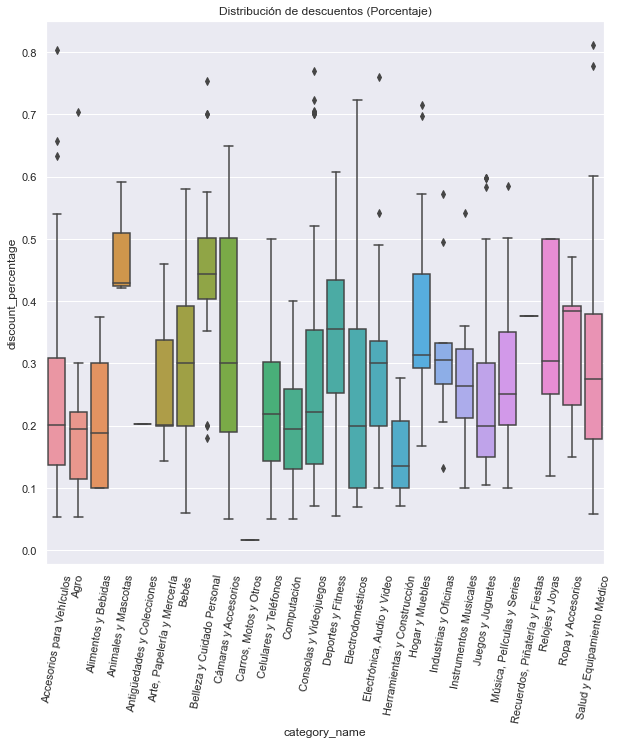

In [66]:
plt.rcParams['figure.figsize']=(10,10)
plt.xticks(rotation=80)
plt.title("Distribución de descuentos (Porcentaje)")
ax = sns.boxplot(data=discount_products, x='category_name', y='discount_percentage')

Cuando lo vemos con % relativos al precio original, ya **no vemos que el descuento de los celulares sea el mayor** con esta metrica, si no que la categoría de **Animales y mascotas** cobra relevancia si vemos los decuentos más importantes para el usuario respecto a su precio original. La categoría de celulares sigue siendo importante, pero ya no es la única que cobra relevancia viendo los descuentos de esta forma. 

In [95]:
# Correlation analysis

# Primera correlación a nivel general 
general_corr = discount_products[['discount', 'available_quantity', 'sold_quantity']].corr()['discount']
print("Correlación con el descuento de available_quantity es %.2f y de sold_quantity es %.2f" % (general_corr['available_quantity'], general_corr['sold_quantity']))

Correlación con el descuento de available_quantity es -0.04 y de sold_quantity es -0.10


Aquí hay un punto importante y es que no solo se puede mirar la correlación a nivel general, que nos podría llegar a concluir erróneamente situaciones que parecen correctas, pero no lo son. En este caso pareciera entonces que los vendedores que hacen promociones son personas que han vendido poco y tratan de destacarse a través de promociones, pero sería bueno investigar un poco más y mirar la correlación por las categorías.

In [172]:
# Top categories by number of descounts for analysis of correlations 
top_categories = discount_products.groupby("category_name").id.count().reset_index()
top_categories_raw = top_categories.sort_values(by='id', ascending=False)[:6]['category_name']

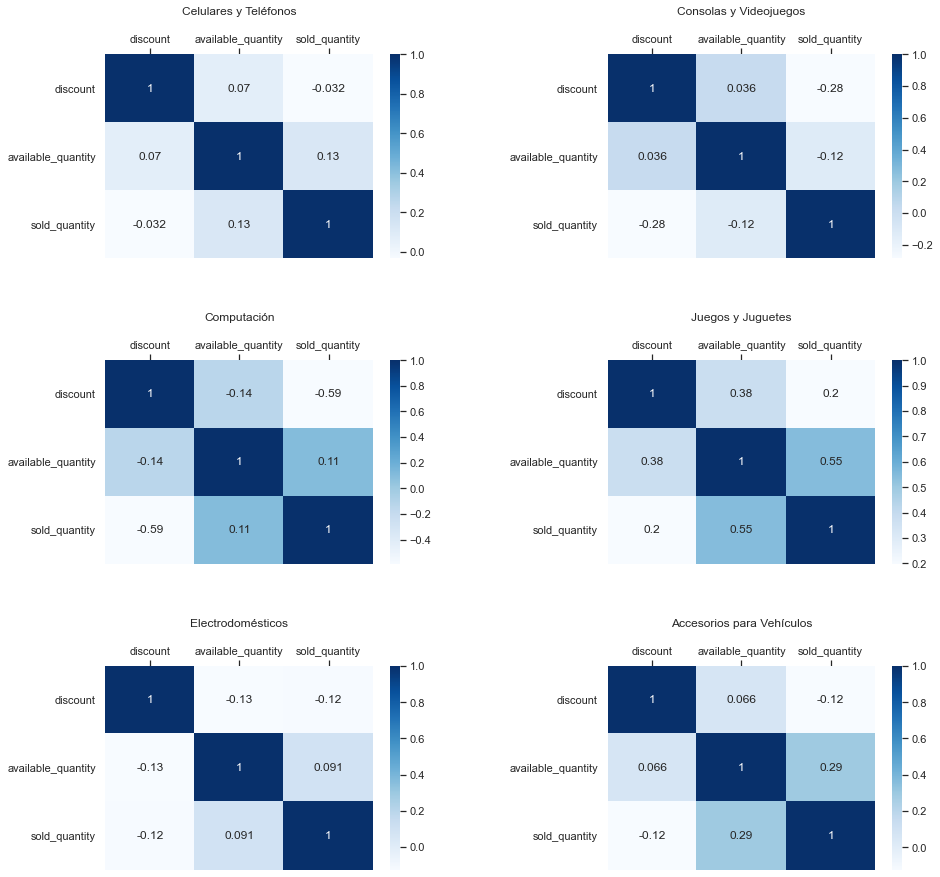

In [176]:
# Correlations for each category
from matplotlib import rcParams
rcParams['axes.titlepad'] = 20 


# Category correlation 
fig = plt.figure(figsize=(15, 15))
plt.subplots_adjust(hspace =0.5, wspace=0.5)

for i, item in enumerate(top_categories_raw): 
    corr = discount_products[discount_products['category_name'] == item][['discount', 'available_quantity', 'sold_quantity']].corr()
    fig.add_subplot(3,2, i+1)
   

    ax = sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap='Blues')
    ax.xaxis.tick_top()
    plt.title(item)


Lo interesante de ver acá es como la mayoría de las categorías siguen el patrón de tener menores unidades vendidas y mayores descuentos. Esto claramente sería una muestra en general de incentivos y posicionamiento dentro de la página ya sea para salir de inventario o posicionarse. 

No todos tienen una correlación negativa entre descuentos y unidades vendidas, por ejemplo, juegos y juguetes pareciera que no dependen de esa relación, lo cual da cierta curiosidad para investigar más y saber las causas ya sea de negocio u otras que se encuentran y aprovecharlas.


In [295]:
def get_item_condition(x): 
    item_condition = '-'
    for item in x: 
        if item['id'] == 'ITEM_CONDITION': 
            item_condition= item['value_name']
            break 
            
    return item_condition
            
discount_products['item_condition'] = discount_products['attributes'].apply(get_item_condition)

In [296]:
# Items condition
discount_products['item_condition'].value_counts()

Nuevo              941
Reacondicionado      2
Name: item_condition, dtype: int64

Quería ver si los ítems se afectaban por el estado que tuvieran, pero prácticamente todos son nuevos y es una variable que no estaría afectando en este análisis.

In [249]:
# Processing of cities and sellers to make some analysis about it
discount_products['city_seller'] = discount_products['seller_address'].apply(lambda x: x['city']['name'])
discount_products['seller_id'] = discount_products['seller'].apply(lambda x: x['id'])
top_localities = discount_products['city_seller'].value_counts()[:20].index

cities_discounts = discount_products[discount_products['city_seller'].isin(top_localities)].groupby("city_seller")\
                    .agg({"discount": ["mean", "count"], "seller_id": lambda x: x.nunique()}).reset_index()

In [250]:
# Put good labels for understanding

cities_discounts = cities_discounts.rename(columns={'mean': 'discount_mean', \
                                 'count': 'discounts_qty', \
                                 '<lambda>': 'unique_sellers'}, level=1)
cities_discounts.columns = cities_discounts.columns.droplevel()
cities_discounts.rename(columns ={"": "ciudad/localidad"}, inplace=True)

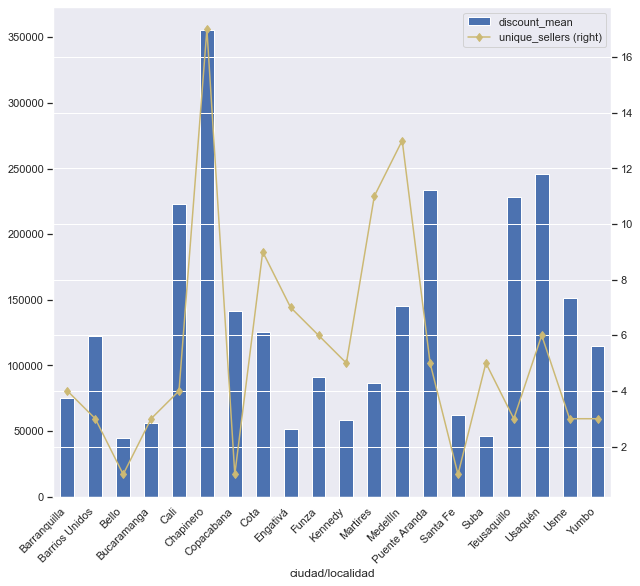

In [288]:
fig2, ax1 = plt.subplots(figsize=(10, 10))

ax_2 = cities_discounts[['ciudad/localidad', 'discount_mean']].plot(kind='bar', color='b', ax=ax1, x='ciudad/localidad')
ax_3 = cities_discounts[['ciudad/localidad', 'unique_sellers']].plot(kind='line', marker='d', x='ciudad/localidad', \
                                                                     secondary_y=True, ax=ax1, color='y')
fig2.autofmt_xdate(rotation=45)

Este gráfico nos ayuda que tantos vendedores están haciendo los descuentos por localidades/ciudades. Sería interesante avisarles a nuevos vendedores que en su zona están haciendo promociones fuertemente en la misma categoría. Sería interesante ver, por qué los descuentos más fuertes están en Chapinero y si se debe alguna razón en específico.

Text(0.5, 1.0, 'Distribución de los descuntos porcentuales')

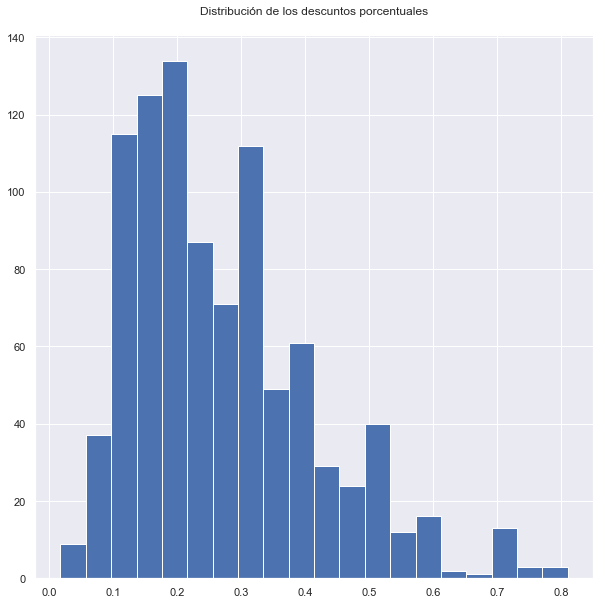

In [291]:
ax = discount_products['discount_percentage'].hist(bins=20)
plt.title("Distribución de los descuntos porcentuales")

Es interesante ver como distribuyen los descuentos y ver que la mayoría cae en el rango del 10% y 30%, inclusive sería más interesante verlo por categoría y/o ciudades. Este análisis serviría un poco más para entender la dinámica de descuentos y luego en caso necesario modelar descuentos recomendables dependiendo del producto/zona/categoría.  